# 透视变换实现

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
from scipy import interpolate
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

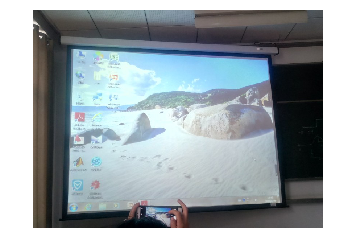

(601, 800, 3)


In [2]:
#img = cv2.imread('.\\data\\5.3.01.tiff',0)
img = cv2.imread('.\\data\\1.jpg')
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

width,height,channels = img.shape

plt.imshow(img,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()

print(img.shape)


In [3]:
width_new = 600
height_new = 400

pts1 = np.float32([[105,100],[650,135],[90,565],[685,535]])#第一个坐标为横向，第二个为纵向
pts2 = np.float32([[0,0],[width_new,0],[0,height_new],[width_new,height_new]])

M = cv2.getPerspectiveTransform(pts1,pts2)


M_inv = np.linalg.inv(M)

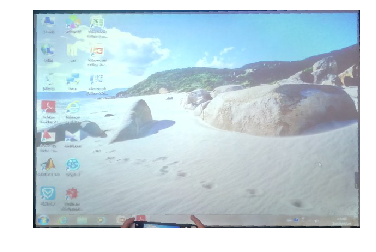

In [4]:
width_new = 600
height_new = 400


my_dst =  np.zeros(( height_new, width_new ,channels),dtype = np.uint8)
n = 0
for i in range(height_new):
    n = n+ 1
    for j in range(width_new):
        pix = np.dot(M_inv,np.array([j,i,1]).T)

        a = np.array([M[2,0]*pix[0]-1,M[2,1]*pix[0],M[2,0]*pix[1],M[2,1]*pix[1]-1]).reshape(2,2)
        b = np.array([-pix[0], -pix[1]]).T

        a_inv = np.linalg.inv(a)
        real_pix = np.dot(a_inv , b)
        
        #print(real_pix)
        my_dst[i,j,0] = img[int(real_pix[1]),int(real_pix[0]),0]
        my_dst[i,j,1] = img[int(real_pix[1]),int(real_pix[0]),1]
        my_dst[i,j,2] = img[int(real_pix[1]),int(real_pix[0]),2]
        
        
plt.imshow(my_dst)
plt.axis("off")#去除坐标轴
plt.show()

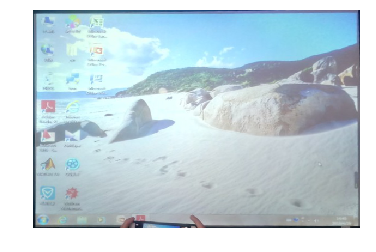

In [5]:
dst = cv2.warpPerspective(img,M,(width_new, height_new))

plt.imshow(dst,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()


In [6]:
def revComputPix(i,j):
        pix = np.dot(M_inv,np.array([i,j,1]).T)

        a = np.array([M[2,0]*pix[0]-1,M[2,1]*pix[0],M[2,0]*pix[1],M[2,1]*pix[1]-1]).reshape(2,2)
        b = np.array([-pix[0], -pix[1]]).T

        a_inv = np.linalg.inv(a)
        real_pix = np.dot(a_inv , b)
        
        print(real_pix)
        
        
width_new = 600
height_new = 400       
[105,100],[650,135],[90,565],[685,535]
[0,0],[600,0],[0,400],[600,400]  


revComputPix(0,0)
revComputPix(600,0)
revComputPix(0,400)
revComputPix(600,400)

[105. 100.]
[650. 135.]
[ 90. 565.]
[685. 535.]


In [7]:
def unDone():
    width_new = 400
    height_new = 300
    dst =  np.zeros((height_new,width_new,3),dtype = np.uint8)
    i = 0

    for i in range(width_new):
        for j in range(height_new):
            computingScaleTemp = (M[2,0]*(105+ i) + M[2,1]*(100 + j) + M[2,2])
            xScale = (M[0,0]*(105+ i) + M[0,1]*(100 + j) + M[0,2]) / computingScaleTemp
            yScale = (M[1,0]*(105+ i) + M[1,1]*(100 + j) + M[1,2]) / computingScaleTemp
            xInt = int(xScale)
            yInt = int(yScale)
            xFrac = xScale - xInt
            yFrac = yScale - yInt

            if(105 + xInt > 601):
                break
            if(100 + xInt > 601):
                break
            Sx1 = img[105 + xInt,100 + yInt,0] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt,0] * xFrac
            Sx2 = img[105 + xInt,100 + yInt + 1,0] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt + 1,0] * xFrac
            dst[i,j,0] = Sx1 * (1 - yFrac) + Sx2 * yFrac

            Sx1 = img[105 + xInt,100 + yInt,1] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt,1] * xFrac
            Sx2 = img[105 + xInt,100 + yInt + 1,1] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt + 1,1] * xFrac
            dst[i,j,1] = Sx1 * (1 - yFrac) + Sx2 * yFrac

            Sx1 = img[105 + xInt,100 + yInt,2] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt,2] * xFrac
            Sx2 = img[105 + xInt,100 + yInt + 1,2] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt + 1,2] * xFrac
            dst[i,j,2] = Sx1 * (1 - yFrac) + Sx2 * yFrac


    '''       Sx1 = img[xInt,yInt,0] * (1 - xFrac) + img[xInt + 1,yInt,0] * xFrac
            Sx2 = img[xInt,100 + yInt + 1,0] * (1 - xFrac) + img[xInt + 1,yInt + 1,0] * xFrac
            dst[i,j,0] = Sx1 * (1 - yFrac) + Sx2 * yFrac

            Sx1 = img[xInt,yInt,1] * (1 - xFrac) + img[xInt + 1,yInt,1] * xFrac
            Sx2 = img[xInt,yInt + 1,1] * (1 - xFrac) + img[xInt + 1,yInt + 1,1] * xFrac
            dst[i,j,1] = Sx1 * (1 - yFrac) + Sx2 * yFrac

            Sx1 = img[xInt,yInt,2] * (1 - xFrac) + img[xInt + 1,yInt,2] * xFrac
            Sx2 = img[xInt,yInt + 1,2] * (1 - xFrac) + img[xInt + 1,yInt + 1,2] * xFrac 

            dst[i,j,2] = Sx1 * (1 - yFrac) + Sx2 * yFrac     '''
        

In [8]:
xnew = np.linspace(-1,1,5)
print(xnew)

[-1.  -0.5  0.   0.5  1. ]
